In [1]:
# -*- coding: utf-8 -*-

"""

@ author: Taehyeong Kim

"""

import math
import random
random.seed(1011)

import numpy as np
np.random.seed(1011)

import pandas as pd

from sklearn.metrics import mean_absolute_error,mean_squared_error

from statsmodels.formula.api import ols
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc("font", family='Malgun Gothic')
plt.rc("axes", unicode_minus=False)

random_seed=1011

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FM/5G.csv', header=1)
data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,주,5세대 이동 통신: (전 세계)
0,2015-10-11,2
1,2015-10-18,2
2,2015-10-25,2
3,2015-11-01,3
4,2015-11-08,2
...,...,...
256,2020-09-06,33
257,2020-09-13,32
258,2020-09-20,32
259,2020-09-27,37


* dummy

* trigonometric (term=1)

* trigonometric (term=2)

* moving average

* simple exponential smoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


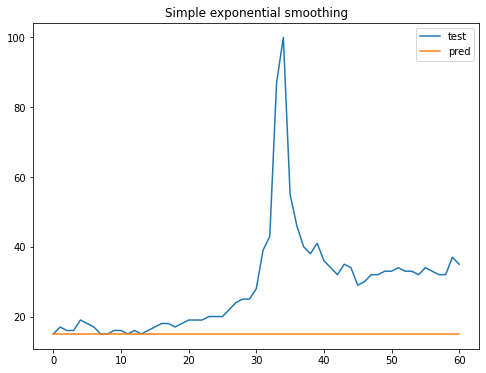

mae: 13.7239
rmse: 20.5285


In [2]:
df=data.copy()
df.columns=["week", "rate"]
df=df.set_index("week", drop=False)
df["time"]=np.arange(1, len(df)+1, 1)
df=df.drop("week", axis=1)

train_df=df.iloc[:200]
test_df=df.iloc[200:]
test_df=test_df.reset_index()
len(train_df), len(test_df)

fit=SimpleExpSmoothing(train_df["rate"]).fit()
fit.forecast(1)

pred_df = test_df.copy()
pred_df['rate']=fit.forecast(1)[0]

plt.figure(figsize=(8,6))
plt.plot(test_df["rate"], label="test")
plt.plot(pred_df["rate"], label="pred")

plt.legend()
plt.title("Simple exponential smoothing")
plt.show()

print("mae:",mean_absolute_error(test_df['rate'],pred_df['rate']).round(4))
print("rmse:",np.sqrt(mean_squared_error(test_df['rate'],pred_df['rate'])).round(4))

* double exponential smoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


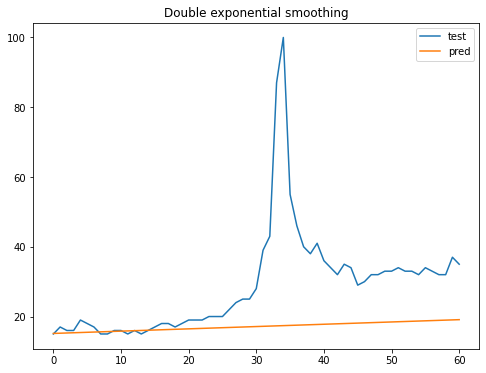

mae: 11.7543
rmse: 18.7653


In [3]:
df=data.copy()
df.columns=["week", "rate"]
df=df.set_index("week", drop=False)
df["time"]=np.arange(1, len(df)+1, 1)
df=df.drop("week", axis=1)

train_df=df.iloc[:200]
test_df=df.iloc[200:]
test_df=test_df.reset_index()
len(train_df), len(test_df)

fit=Holt(train_df["rate"]).fit()

pred_df = test_df.copy()
pred_df['rate']=fit.forecast(len(test_df)).values

plt.figure(figsize=(8,6))
plt.plot(test_df["rate"], label="test")
plt.plot(pred_df["rate"], label="pred")

plt.legend()
plt.title("Double exponential smoothing")
plt.show()

print("mae:",mean_absolute_error(test_df['rate'],pred_df['rate']).round(4))
print("rmse:",np.sqrt(mean_squared_error(test_df['rate'],pred_df['rate'])).round(4))

* Holt-Winters